# Simulation of Continuous-Time Galton-Watson Processes

This section explains the algorithm used to simulate these processes.  This is not the focus of the subject, but it is useful to know as we are using it for comparisons.

One of the most common ways to simulate a Continuous-Time Galton-Watson Process is the so-called Gillespie Algorithm.  For most cases this is very fast, and it avoids some complications that arise for other methods that might be based on looking at discrete time steps.

The algorithm is based on the combiing Poisson Processes into compound Poisson processes.

First we consider the compound process for an individual in which an individual is removed at rate $r$ and immediately replaced by  $k$ individuals with probabilities $p_0, p_2, p_3, \ldots$ (we have $p_1=0$).  We can combine all of these into a single population-wide compound Poisson proces with rate $r \ell$ (if $\ell$ is the current population size).  

The waiting time until the next event can be chosen from an exponential distribution with rate $r\ell$ (this is the continous-time equivalent of the geometric distribution, which corresponds to a survival function of $e^{-r\ell t}$).  Note that different computer languages may want the exponential distribution argument to be the rate $r$ or the scale $1/r$

When an event occurs, $k$ is chosen from the distribution, and then the population size is replaced by $\ell - 1 + k$.  The algorithm continues with this new value of $\ell$.

~~~{prf:algorithm} Gillespie Algorithm
:label: Alg-Gillespie

**Inputs**

```
float r #rate of one individual's process
function FindK #to generate k given distribution p_k
float maxtime #stopping condition
```

**Algorithm**

```
Set time=0 and PopSize=1
times = [time]
sizes = [PopSize]
While PopSize>0 and time<maxtime:
    TimeToNextEvent = exponential(1/(PopSize*r)) #note, numpy wants 1/rate
    time += TimeToNextEvent
    k = FindK()
    PopSize += k-1
    times.append(time)
    sizes.append(Popsize)
return times, sizes
```
~~~


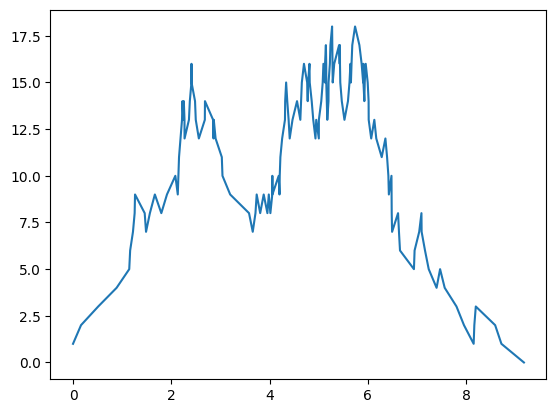

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def Gillespie(r, FindK, maxtime, rng = np.random.default_rng):
    time = 0
    PopSize = 1
    times = [time]
    sizes = [PopSize]
    while PopSize>0 and time<maxtime:
        TimeToNextEvent = rng.exponential(1/(PopSize*r))
        time += TimeToNextEvent
        k = FindK()
        PopSize += k-1
        times.append(time)
        sizes.append(PopSize)
    return times, sizes


beta = 1
gamma = 0.95
r = beta+gamma

rng = np.random.default_rng()
def FindK():
    if rng.random()<beta/r:
        return 2
    else:
        return 0
    
times, sizes = Gillespie(r, FindK, maxtime=20, rng=rng)
plt.plot(times, sizes)

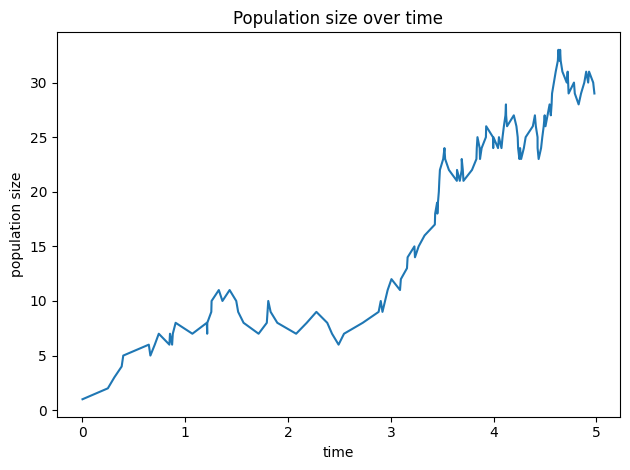

<Figure size 900x600 with 0 Axes>

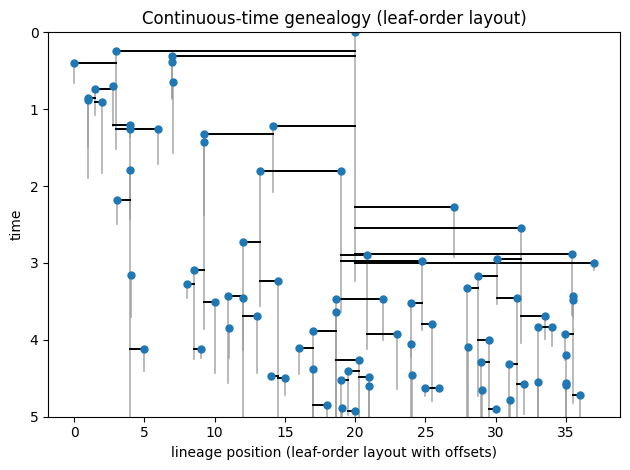

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


from AMSI_2026_PGF_tools import *


# ------------------------------------------------------------
# Model parameters
# ------------------------------------------------------------

beta = 1.0
gamma = 0.9
r = beta + gamma
maxtime = 5

rng = np.random.default_rng()


def FindK():
    """
    Birth–death mechanism:
      with probability beta / r  -> birth event (k = 2)
      with probability gamma / r -> death event (k = 0)
    """
    if rng.random() < beta / r:
        return 2
    else:
        return 0


# ------------------------------------------------------------
# Run Gillespie simulation and generate the tree
# ------------------------------------------------------------

G, times, sizes = GillespieTree(
    r=r,
    FindK=FindK,
    maxtime=maxtime,
    rng=rng
)

# Optional: plot population size over time
plt.figure()
plt.plot(times, sizes)
plt.xlabel("time")
plt.ylabel("population size")
plt.title("Population size over time")
plt.tight_layout()
plt.show()


# ------------------------------------------------------------
# Plot the genealogical tree
# ------------------------------------------------------------

plt.figure(figsize=(9, 6))
plot_ct_tree_leaf_layout_with_offsets(G, maxtime=maxtime, show_labels=False)
plt.tight_layout()
plt.show()